<a href="https://colab.research.google.com/github/pliniosa/Analise_Game/blob/main/Projeto4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mercado De Jogos

## Imports das Libs

In [1]:
# Modelagem e Matrizes
import numpy as np
import pandas as pd

# Análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

## Carregando os dados

In [18]:
Base_Dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


## Analisando a Base de dados


In [19]:
#Dimensão
Base_Dados.shape

(1034, 9)

In [20]:
#Nulos
Base_Dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

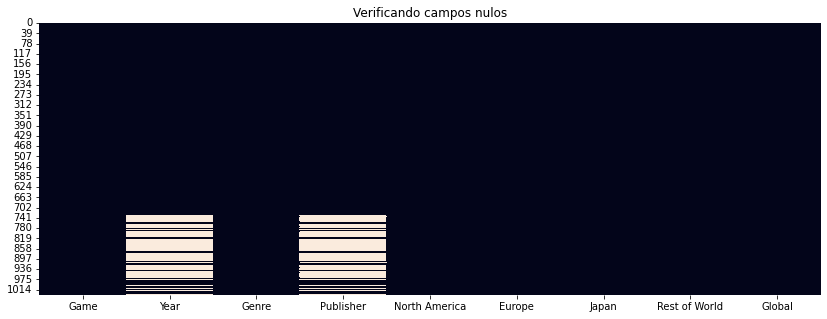

In [21]:
#Nulos em forma gráfica
plt.figure( figsize=(14,5))
plt.title('Verificando campos nulos')
sns.heatmap(Base_Dados.isnull(), cbar=False);

##Retirando os valores nulos

In [22]:
Base_Dados.dropna( inplace=True)

In [23]:
#Verificando o novo shape
Base_Dados.shape

(825, 9)

##Estatisticas

In [24]:
Base_Dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


##Analizando os dados grafico

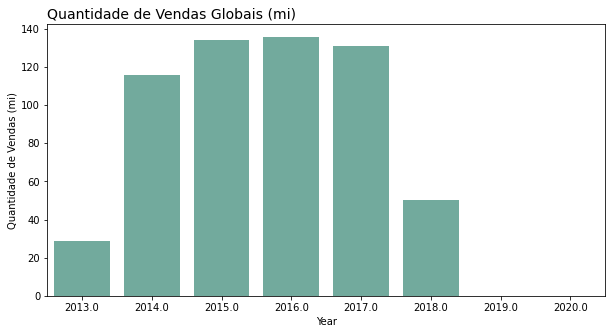

In [25]:
# Figura
plt.figure( figsize=(10,5))
#Titulo
plt.title('Quantidade de Vendas Globais (mi)', loc='left', fontsize=14)
#Grafico
sns.barplot(data=Base_Dados, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum)
#Label
plt.ylabel('Quantidade de Vendas (mi)');

# Retirar os anos sem dados

In [31]:
Base_Dados = Base_Dados.loc[ (Base_Dados['Year'] != 2019) & (Base_Dados['Year'] != 2020)]

Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


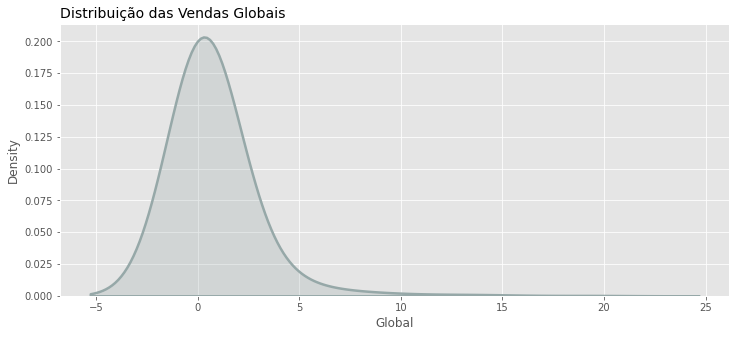

In [35]:
#Tamanho da imagem
plt.figure( figsize=(12,5))

#Estilo
plt.style.use('ggplot')

#Titulo
plt.title('Distribuição das Vendas Globais', loc='left', fontsize=14)

#Plot
sns.kdeplot( Base_Dados['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5);

#Agrupando os dados para analizar

In [89]:
Base_Dados.groupby( by=['Year']).sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


##Analizando os outliers


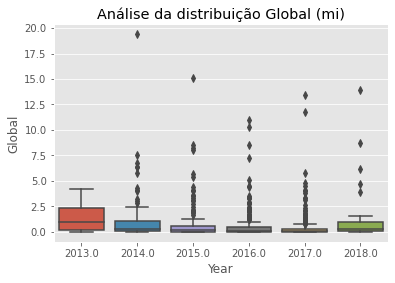

In [90]:
#Tamanho da imagem
plt.Figure( figsize=(10,4))

#Titulo
plt.title('Análise da distribuição Global (mi)')

sns.boxplot(data=Base_Dados, x='Year', y='Global');

In [91]:
#Vizualizando quem são os outliers
Base_Dados.loc[ Base_Dados['Global']>=10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


#Verificando a proporção dos 100% de cada continemente comparado ao Total

In [93]:
Analise = Base_Dados.groupby( by=['Year']).sum().reset_index()

America = [ America / Total * 100 for America, Total in zip( Analise['North America'], Analise['Global'])]
Europa= [ Europa / Total * 100 for Europa, Total in zip( Analise['Europe'], Analise['Global'])]
Japao = [ Japao / Total * 100 for Japao, Total in zip( Analise['Japan'], Analise['Global'])]
Resto_Mundo = [ Resto_Mundo / Total * 100 for Resto_Mundo, Total in zip( Analise['Rest of World'], Analise['Global'])]

America, Europa, Japao, Resto_Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

##Empilhando os dados


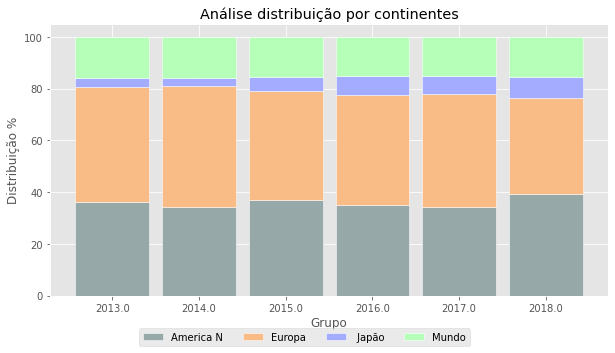

In [96]:
# Tamanho da figura
plt.figure(figsize=(10,5))

# Largura barra no gráfico
Largura_Barra = 0.85
Rotulos = Analise['Year']
Grupos = [0, 1, 2, 3, 4, 5]

# Titulo
plt.title('Análise distribuição por continentes')

#Plot America
plt.bar(Grupos, America, width=Largura_Barra, color='#96a8a8', edgecolor='white')

#Plot Europa
plt.bar(Grupos, Europa, bottom=America, width=Largura_Barra, color='#f9bc86', edgecolor='white')

#Plot Japao
plt.bar(Grupos, Japao, bottom=[A + B for A, B in zip(America, Europa)], width=Largura_Barra, color='#a3acff', edgecolor='white')

#Plot Resto do Mundo
plt.bar(Grupos, Resto_Mundo, bottom=[A + B + C for A, B, C in zip(America, Europa, Japao)], width=Largura_Barra, color='#b5ffb9', edgecolor='white')

# Labels
plt.xticks( Grupos, Rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

# Legenda
plt.legend(['America N', 'Europa',' Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4);


##Analisando as strings

In [97]:
Base_Dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [103]:
# Associando numero às Strings

from sklearn.preprocessing import LabelEncoder
Funcao_Label = LabelEncoder()

# Inserindo na base de dados
Base_Dados['Produtor'] = Funcao_Label.fit_transform( Base_Dados['Publisher'])
Base_Dados['Genero'] = Funcao_Label.fit_transform( Base_Dados['Genre'])
Base_Dados['Jogo'] = Funcao_Label.fit_transform( Base_Dados['Game'])

Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


## Plot usando paletas de cores

In [127]:
#Paleta de cores

 #'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 
 #'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
 #'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
 #'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
 #'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 
 #'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 
 #'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 
 #'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 
 #'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 
 #'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 
 #'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 
 #'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r'

Paleta_Cores = sns.color_palette('husl', 3)
Paleta_Cores


[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744)]

In [128]:
Base_Dados[['Produtor', 'Publisher']]

,Produtor,Publisher
0,107,Rockstar Games
1,8,Activision
2,107,Rockstar Games
3,8,Activision
4,40,EA Sports
...,...,...
1024,121,THQ Nordic
1026,121,THQ Nordic
1027,34,Daedalic Entertainment
1028,17,Bandai Namco Entertainment


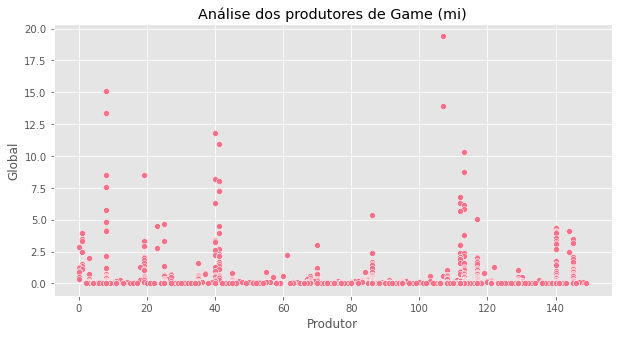

In [129]:
# Tamanho da figura
plt.figure( figsize=(10,5))

# Titulo
plt.title('Análise dos produtores de Game (mi)')

# Plot
sns.scatterplot( data=Base_Dados, x='Produtor', y='Global', color = Paleta_Cores[0]);

In [130]:
Base_Dados[['Genero', 'Genre']]

,Genero,Genre
0,0,Action
1,12,Shooter
2,1,Action-Adventure
3,12,Shooter
4,14,Sports
...,...,...
1024,0,Action
1026,8,Platform
1027,2,Adventure
1028,0,Action


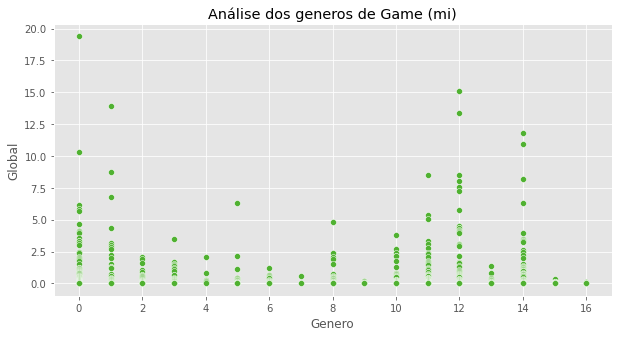

In [131]:
# Tamanho da figura
plt.figure( figsize=(10,5))

# Titulo
plt.title('Análise dos generos de Game (mi)')

# Plot
sns.scatterplot( data=Base_Dados, x='Genero', y='Global', color = Paleta_Cores[1]);

In [132]:
Base_Dados[['Jogo', 'Game']]

,Jogo,Game
0,273,Grand Theft Auto V
1,98,Call of Duty: Black Ops 3
2,521,Red Dead Redemption 2
3,102,Call of Duty: WWII
4,222,FIFA 18
...,...,...
1024,72,Biomutant
1026,802,de Blob
1027,107,Chaos on Deponia
1028,114,Code Vein


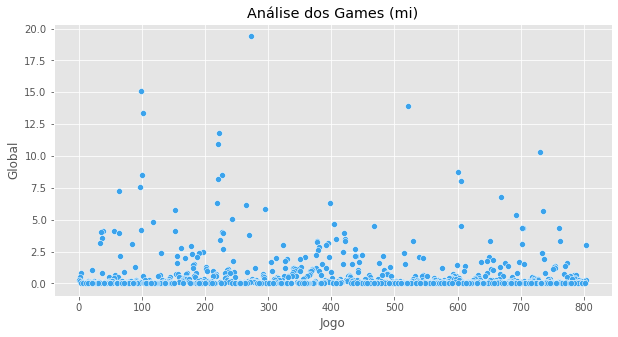

In [133]:
# Tamanho da figura
plt.figure( figsize=(10,5))

# Titulo
plt.title('Análise dos Games (mi)')

# Plot
sns.scatterplot( data=Base_Dados, x='Jogo', y='Global', color = Paleta_Cores[2]);